In [8]:
import numpy as np
from math import tau
import matplotlib.pyplot as plt

from utils import perimeter_hm, perimeter_gm, perimeter_am, perimeter_rms, perimeter_parker, perimeter_bessel
from utils import find_fractional_approx

# First thing first

Matt, you've missed an opportunity to write your approximation as

\begin{equation}
3\tau \left( \frac{a}{5} + \frac{b}{8} \right)
\end{equation}

Here is my submission

\begin{equation}
\tau \left( \frac{7}{45} a + \frac{27}{41} \sqrt{\frac{a^2+b^2}{2}} + \frac{7}{37} b \right)
\end{equation}

# Calibration

I would like to make sure if the code for the perimeter of ellipse is correct.

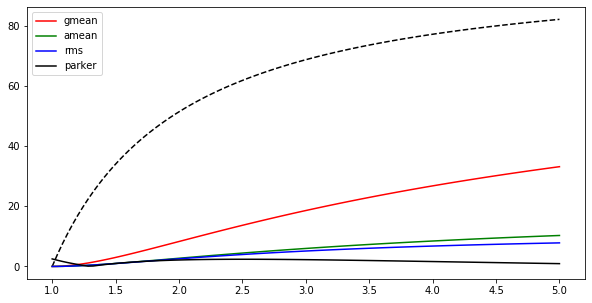

In [9]:
space = np.linspace(1, 5, 100)

hm = perimeter_hm(space)
gm = perimeter_gm(space)
am = perimeter_am(space)
rms = perimeter_rms(space)
parker = perimeter_parker(space)
bessel = perimeter_bessel(space)

plt.figure(figsize=(10, 5))
plt.plot(space, np.abs(1 - hm / bessel) * 100, "k--")
plt.plot(space, np.abs(1 - gm / bessel) * 100, "r-", label="gmean")
plt.plot(space, np.abs(1 - am / bessel) * 100, "g-", label="amean")
plt.plot(space, np.abs(1 - rms / bessel) * 100, "b-", label="rms")
plt.plot(space, np.abs(1 - parker / bessel) * 100, "k-", label="parker")
plt.legend()

Looks good to me as it follows the trend as in [Matt's video](https://www.youtube.com/watch?v=5nW3nJhBHL0&t=826s).

# Generalized Matt's approximation -> $\tau (x_0 a + x_1 b)$

I would like to find the best out of Matt's simple approximation. I used **numerical methods** to optimize the generalized model. The error would be computed at `np.linspace(1, 5, 1000)`.

In [10]:
from scipy.optimize import minimize

In [11]:
def perimeter_jcop(x, a, b=1):
    return tau * (x[0] * a + x[1] * b)

def error(x):
    space = np.linspace(1, 5, 1000)
    jcop = perimeter_jcop(x, space)
    bessel = perimeter_bessel(space)
    return (np.abs(1 - jcop / bessel) * 100).sum()

In [12]:
x_guess = (0, 0)
bound = (-1.5, 1.5)
sol = minimize(error, x_guess, bounds=(bound, bound))
[find_fractional_approx(x) for x in sol.x]

[(10, 17), (22, 59)]

Instead of using the optimal solution $\tau (0.58786245 a + 0.373148 b)$, I would also like to have a neat solution, so I computed the fraction approximation for the solution algorithmically. Hence, resulted in 

\begin{equation}
\tau \left( \frac{10}{17}a + \frac{22}{59}b \right)
\end{equation}

# Let's see the error

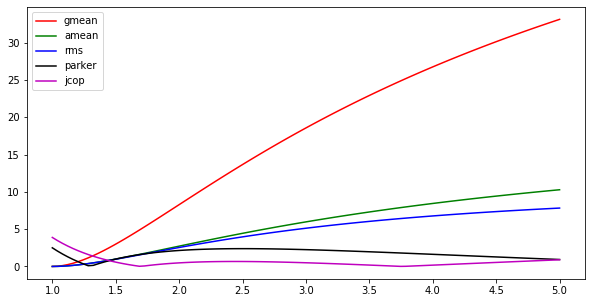

In [13]:
space = np.linspace(1, 5, 100)

gm = perimeter_gm(space)
am = perimeter_am(space)
rms = perimeter_rms(space)
parker = perimeter_parker(space)
bessel = perimeter_bessel(space)
jcop = perimeter_jcop((10/17, 22/59), space)

plt.figure(figsize=(10, 5))
plt.plot(space, np.abs(1 - gm / bessel) * 100, "r-", label="gmean")
plt.plot(space, np.abs(1 - am / bessel) * 100, "g-", label="amean")
plt.plot(space, np.abs(1 - rms / bessel) * 100, "b-", label="rms")
plt.plot(space, np.abs(1 - parker / bessel) * 100, "k-", label="parker")
plt.plot(space, np.abs(1 - jcop / bessel) * 100, "m-", label="jcop")
plt.legend()

# It's not as good at small and larger $a/b$ values

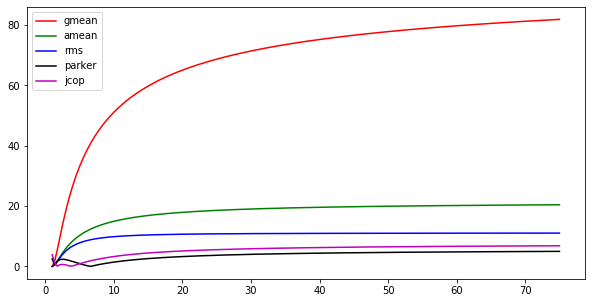

In [14]:
space = np.linspace(1, 75, 200)

gm = perimeter_gm(space)
am = perimeter_am(space)
rms = perimeter_rms(space)
parker = perimeter_parker(space)
bessel = perimeter_bessel(space)
jcop = perimeter_jcop((10/17, 22/59), space)

plt.figure(figsize=(10, 5))
plt.plot(space, np.abs(1 - gm / bessel) * 100, "r-", label="gmean")
plt.plot(space, np.abs(1 - am / bessel) * 100, "g-", label="amean")
plt.plot(space, np.abs(1 - rms / bessel) * 100, "b-", label="rms")
plt.plot(space, np.abs(1 - parker / bessel) * 100, "k-", label="parker")
plt.plot(space, np.abs(1 - jcop / bessel) * 100, "m-", label="jcop")
plt.legend()

# Improvement with RMS

As we can see that out of all the mean computation (harmonic, arithmetic, geometric, and rms), rms performs the best. So let's include that in our model.


\begin{equation}
\tau \left( x_0 a + x_1 \sqrt{ \left( \frac{a^2+b^2}{2} \right) } + x_2 b \right)
\end{equation}

In [15]:
def perimeter_jcop(x, a, b=1):
    return tau * (x[0] * a + x[1] * np.sqrt((a**2 + b**2)/2) + x[2] * b)

def error(x):
    space = np.linspace(1, 5, 1000)
    jcop = perimeter_jcop(x, space)
    bessel = perimeter_bessel(space)
    return (np.abs(1 - jcop / bessel) * 100).sum()

In [16]:
x_guess = (0, 0, 0)
bound = (-1.5, 1.5)
sol = minimize(error, x_guess, bounds=(bound, bound, bound))
[find_fractional_approx(x) for x in sol.x]

[(7, 45), (27, 41), (7, 37)]

I would again used the fractinal approximation just for aesthetic

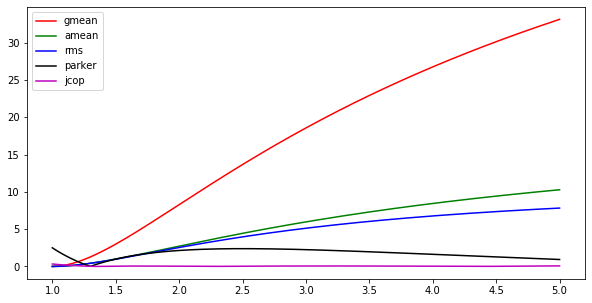

In [17]:
space = np.linspace(1, 5, 200)

gm = perimeter_gm(space)
am = perimeter_am(space)
rms = perimeter_rms(space)
parker = perimeter_parker(space)
bessel = perimeter_bessel(space)
jcop = perimeter_jcop((7/45, 27/41, 7/37), space)

plt.figure(figsize=(10, 5))
plt.plot(space, np.abs(1 - gm / bessel) * 100, "r-", label="gmean")
plt.plot(space, np.abs(1 - am / bessel) * 100, "g-", label="amean")
plt.plot(space, np.abs(1 - rms / bessel) * 100, "b-", label="rms")
plt.plot(space, np.abs(1 - parker / bessel) * 100, "k-", label="parker")
plt.plot(space, np.abs(1 - jcop / bessel) * 100, "m-", label="jcop")
plt.legend()

# It also worked quite well on large $a/b$

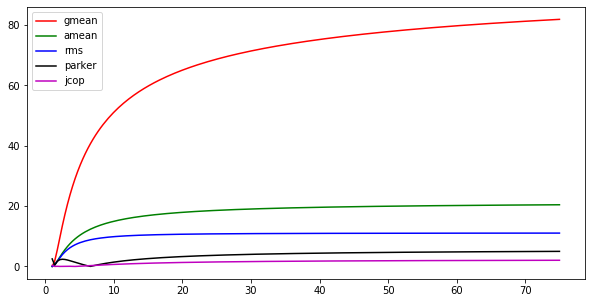

In [18]:
space = np.linspace(1, 75, 200)

gm = perimeter_gm(space)
am = perimeter_am(space)
rms = perimeter_rms(space)
parker = perimeter_parker(space)
bessel = perimeter_bessel(space)
jcop = perimeter_jcop((7/45, 27/41, 7/37), space)

plt.figure(figsize=(10, 5))
plt.plot(space, np.abs(1 - gm / bessel) * 100, "r-", label="gmean")
plt.plot(space, np.abs(1 - am / bessel) * 100, "g-", label="amean")
plt.plot(space, np.abs(1 - rms / bessel) * 100, "b-", label="rms")
plt.plot(space, np.abs(1 - parker / bessel) * 100, "k-", label="parker")
plt.plot(space, np.abs(1 - jcop / bessel) * 100, "m-", label="jcop")
plt.legend()

# So this is my submission for Ellipse's perimeter approximation

\begin{equation}
C \approx \tau \left( \frac{7}{45} a + \frac{27}{41} \sqrt{\frac{a^2+b^2}{2}} + \frac{7}{37} b \right)
\end{equation}